In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import string
%matplotlib notebook
import seaborn as sns

In [2]:
#csv file reference to load for fast food
csv_path = "../Resources/FastFoodRestaurants.csv"
#read/store into Pandas DF
fast_food_data = pd.read_csv(csv_path, encoding = 'utf-8')
fast_food_data.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [3]:
#read CDC csv
pd.set_option('display.max_columns', None)
raw_data = pd.read_csv("../Resources/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
raw_data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2012,2012,WY,Wyoming,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,48.5,48.5,NaN,NaN,32.3,64.9,69,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native,"(43.235541343, -108.109830353)",OWS,OWS1,Q037,VALUE,56,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
1,2012,2012,DC,District of Columbia,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.6,31.6,NaN,NaN,24.0,40.4,243,NaN,NaN,Less than high school,NaN,NaN,NaN,"(38.890371385, -77.031961127)",OWS,OWS1,Q036,VALUE,11,Education,Less than high school,EDU,EDUHS
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,35.2,35.2,NaN,NaN,30.7,40.0,598,NaN,25 - 34,NaN,NaN,NaN,NaN,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,27.9,27.9,NaN,NaN,27.6,28.3,"266,452",NaN,NaN,NaN,Female,NaN,NaN,NaN,PA,PA1,Q047,VALUE,59,Gender,Female,GEN,FEMALE
4,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,16.9,16.9,NaN,NaN,16.0,17.8,"20,923",NaN,18 - 24,NaN,NaN,NaN,NaN,NaN,PA,PA1,Q047,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824


In [4]:
fast_food_data.info()
# result below means that this particular dataset has 10K restaurants which includes address details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     10000 non-null  object 
 1   city        10000 non-null  object 
 2   country     10000 non-null  object 
 3   keys        10000 non-null  object 
 4   latitude    10000 non-null  float64
 5   longitude   10000 non-null  float64
 6   name        10000 non-null  object 
 7   postalCode  10000 non-null  object 
 8   province    10000 non-null  object 
 9   websites    9535 non-null   object 
dtypes: float64(2), object(8)
memory usage: 781.4+ KB


In [5]:
fast_food_data.count()

address       10000
city          10000
country       10000
keys          10000
latitude      10000
longitude     10000
name          10000
postalCode    10000
province      10000
websites       9535
dtype: int64

In [6]:
# remove rows with missing data
fast_food_data = fast_food_data.dropna(how="any")
fast_food_data.count()

address       9535
city          9535
country       9535
keys          9535
latitude      9535
longitude     9535
name          9535
postalCode    9535
province      9535
websites      9535
dtype: int64

In [7]:
fast_food_data.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [8]:
# drop keys and website columns because they're not needed
fast_food_data.drop('keys', axis=1, inplace=True)
fast_food_data.head()

,address,city,country,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [9]:
# drop website column
fast_food_data.drop('websites', axis=1, inplace=True)
fast_food_data.head()

,address,city,country,latitude,longitude,name,postalCode,province
0,324 Main St,Massena,US,44.92130,-74.89021,McDonald's,13662,NY
1,530 Clinton Ave,Washington Court House,US,39.53255,-83.44526,Wendy's,43160,OH
2,408 Market Square Dr,Maysville,US,38.62736,-83.79141,Frisch's Big Boy,41056,KY
3,6098 State Highway 37,Massena,US,44.95008,-74.84553,McDonald's,13662,NY
4,139 Columbus Rd,Athens,US,39.35155,-82.09728,OMG! Rotisserie,45701,OH


In [10]:
# drop country column
fast_food_data.drop('country', axis=1, inplace=True)
fast_food_data.head()

,address,city,latitude,longitude,name,postalCode,province
0,324 Main St,Massena,44.92130,-74.89021,McDonald's,13662,NY
1,530 Clinton Ave,Washington Court House,39.53255,-83.44526,Wendy's,43160,OH
2,408 Market Square Dr,Maysville,38.62736,-83.79141,Frisch's Big Boy,41056,KY
3,6098 State Highway 37,Massena,44.95008,-74.84553,McDonald's,13662,NY
4,139 Columbus Rd,Athens,39.35155,-82.09728,OMG! Rotisserie,45701,OH


In [11]:
# rename province to state
fast_food_data = fast_food_data.rename(columns={"province": "state"})
fast_food_data.head()

,address,city,latitude,longitude,name,postalCode,state
0,324 Main St,Massena,44.92130,-74.89021,McDonald's,13662,NY
1,530 Clinton Ave,Washington Court House,39.53255,-83.44526,Wendy's,43160,OH
2,408 Market Square Dr,Maysville,38.62736,-83.79141,Frisch's Big Boy,41056,KY
3,6098 State Highway 37,Massena,44.95008,-74.84553,McDonald's,13662,NY
4,139 Columbus Rd,Athens,39.35155,-82.09728,OMG! Rotisserie,45701,OH


In [12]:
fast_food_data['name'].sort_values()

8834                   7-Eleven
5526    A & W Family Restaurant
6306                        A&W
9134                        A&W
6902      A&W All-American Food
                 ...           
8157                  Yoshinoya
7762             Yum Brands Inc
9468                    Zaxby's
8282     Ziti's Italian Express
574                      b.good
Name: name, Length: 9535, dtype: object

In [13]:
fast_food_data.name = fast_food_data.name.apply(lambda x: x.lower())
fast_food_data.name = fast_food_data.name.apply(lambda x:''.join([i for i in x
                                                                 if i not in string.punctuation]))
fast_food_data.head()

,address,city,latitude,longitude,name,postalCode,state
0,324 Main St,Massena,44.92130,-74.89021,mcdonalds,13662,NY
1,530 Clinton Ave,Washington Court House,39.53255,-83.44526,wendys,43160,OH
2,408 Market Square Dr,Maysville,38.62736,-83.79141,frischs big boy,41056,KY
3,6098 State Highway 37,Massena,44.95008,-74.84553,mcdonalds,13662,NY
4,139 Columbus Rd,Athens,39.35155,-82.09728,omg rotisserie,45701,OH


In [14]:
fast_food_data['name'].sort_values().unique()

array(['7eleven', 'a  w family restaurant', 'alices', 'ama ristorante',
       'amigoskings classic', 'aprisa mexican cuisine', 'arbys',
       'arctic circle', 'au bon pain', 'auntie annes', 'aw',
       'aw allamerican food', 'aw allamerican foods', 'aw restaurant',
       'awlong john silvers', 'b good', 'b k',
       'b z breakfast burgers beyond', 'back yard burgers',
       'backyard burgers', 'bad daddys burger bar', 'baja fresh',
       'baja fresh mexican grill', 'bakers drive thru',
       'ball state lafollette dining', 'bamboo bistro', 'baskinrobbins',
       'bbt', 'ben  jerrys', 'bgood', 'bgr  the burger joint',
       'big  littles restaurant', 'bills place', 'blakes lotaburger',
       'blimpie', 'blimpie subs  sandwiches', 'blondies', 'bob evans',
       'bob evans restaurant', 'bobbys burger palace',
       'bojangles famous chicken n biscuits', 'boston chowda company',
       'boston market', 'boston market 381', 'braums',
       'braums ice cream  dairy store', 'bra

In [15]:
fast_food_data['state'].sort_values().unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'Co Spgs', 'DC', 'DE',
       'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [16]:
# Co Spgs is not a state
fast_food_data.loc[fast_food_data['state'] == 'Co Spgs',['state']] ='CO'

In [17]:
fast_food_data['state'].sort_values().unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [18]:
fast_food_data.name.value_counts()

mcdonalds                      2054
burger king                    1119
taco bell                       855
wendys                          721
arbys                           512
                               ... 
jim bobs chicken fingers          1
coop deville                      1
royal buffet                      1
blondies                          1
mazatlan mexican restaurant       1
Name: name, Length: 381, dtype: int64

In [19]:
fast_food_data['state'].value_counts().head()

CA    618
TX    603
OH    525
FL    445
IN    369
Name: state, dtype: int64

In [20]:
food_states = pd.DataFrame(fast_food_data['state'].value_counts(ascending=False).reset_index())
food_states.columns = ['State', 'Number of Fast Food Restaurants']
food_states

,State,Number of Fast Food Restaurants
0,CA,618
1,TX,603
2,OH,525
3,FL,445
4,IN,369
5,NC,344
6,IL,337
7,GA,326
8,MO,321
9,KY,320


In [21]:
top_states = pd.DataFrame(fast_food_data['state'].value_counts(ascending=False).head(10).reset_index())
top_states.columns = ['State', 'Number of Fast Food Restaurants']
top_states

,State,Number of Fast Food Restaurants
0,CA,618
1,TX,603
2,OH,525
3,FL,445
4,IN,369
5,NC,344
6,IL,337
7,GA,326
8,MO,321
9,KY,320


<IPython.core.display.Javascript object>


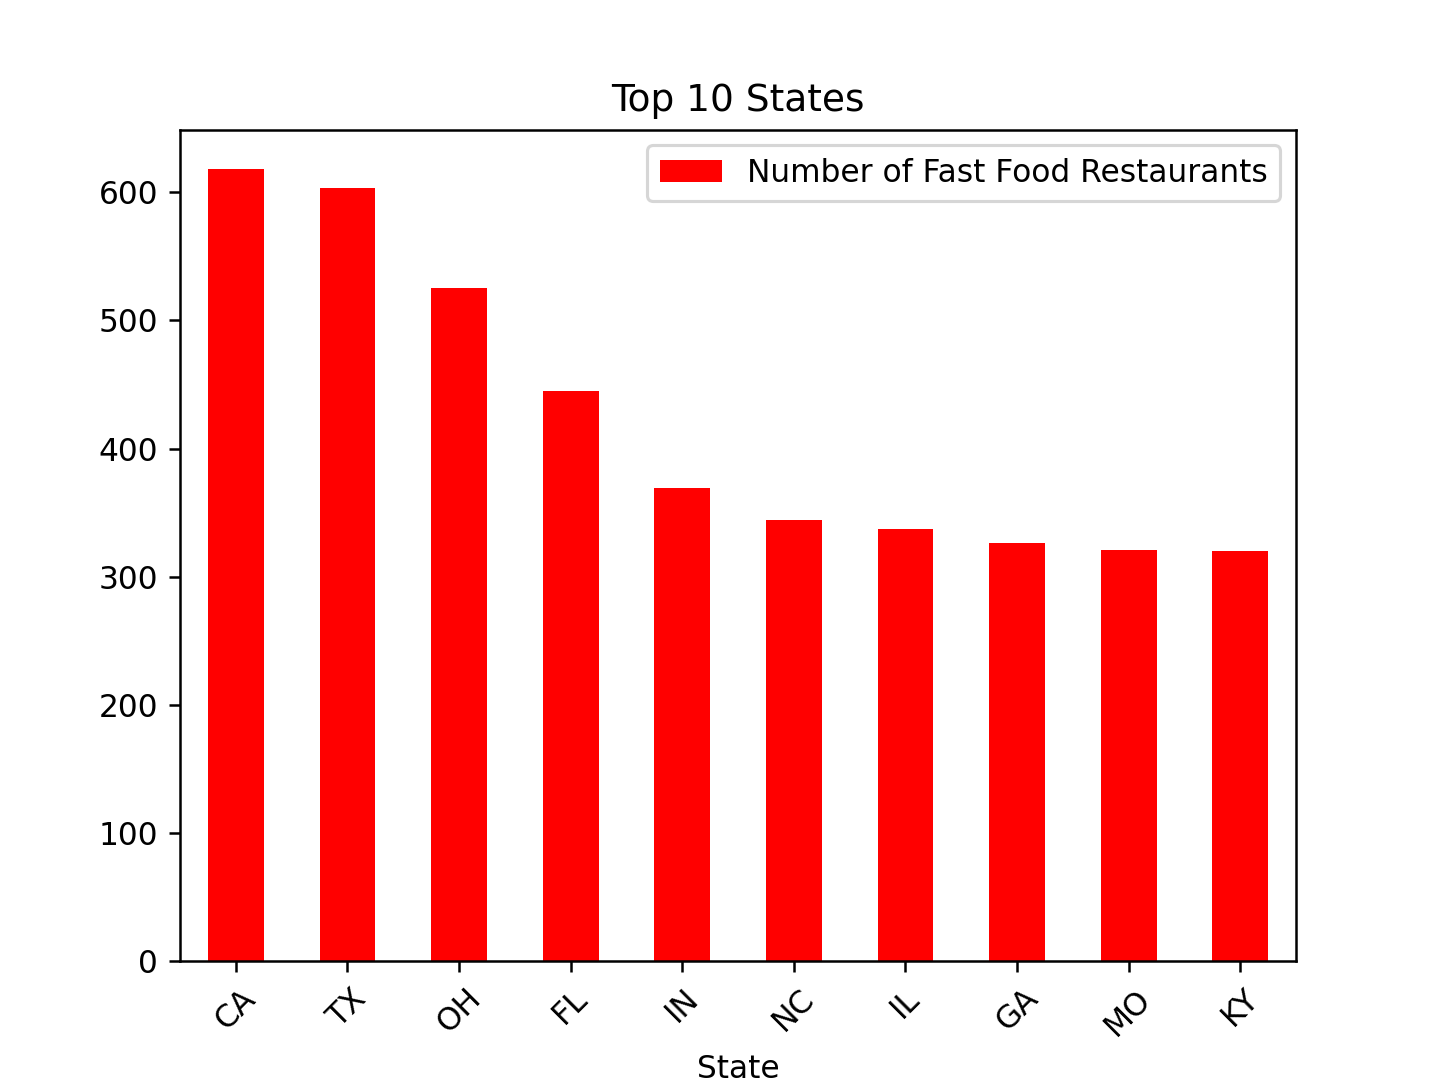

In [22]:
# Bar plot that analyzes the top 10 states with the higest recorded Fast Food restaurants
# using the summary statistics table: Top States

top_states.set_index("State").plot(kind="bar", facecolor="red", rot=45)
plt.title("Top 10 States")
plt.xlabel("State")
plt.legend(loc='best')
plt.show()

In [23]:
# Bar plot that analyzes the bottom 10 states with the least recorded Fast Food restaurants
# using the summary statistics table: Bottom States
bottom_states = pd.DataFrame(fast_food_data['state'].value_counts(ascending=True).head(10).reset_index())
bottom_states.columns = ['State', 'Number of Fast Food Restaurants']
bottom_states

,State,Number of Fast Food Restaurants
0,AK,13
1,DC,19
2,RI,23
3,MT,25
4,DE,30
5,NH,34
6,HI,37
7,WY,41
8,VT,42
9,ME,44


<IPython.core.display.Javascript object>


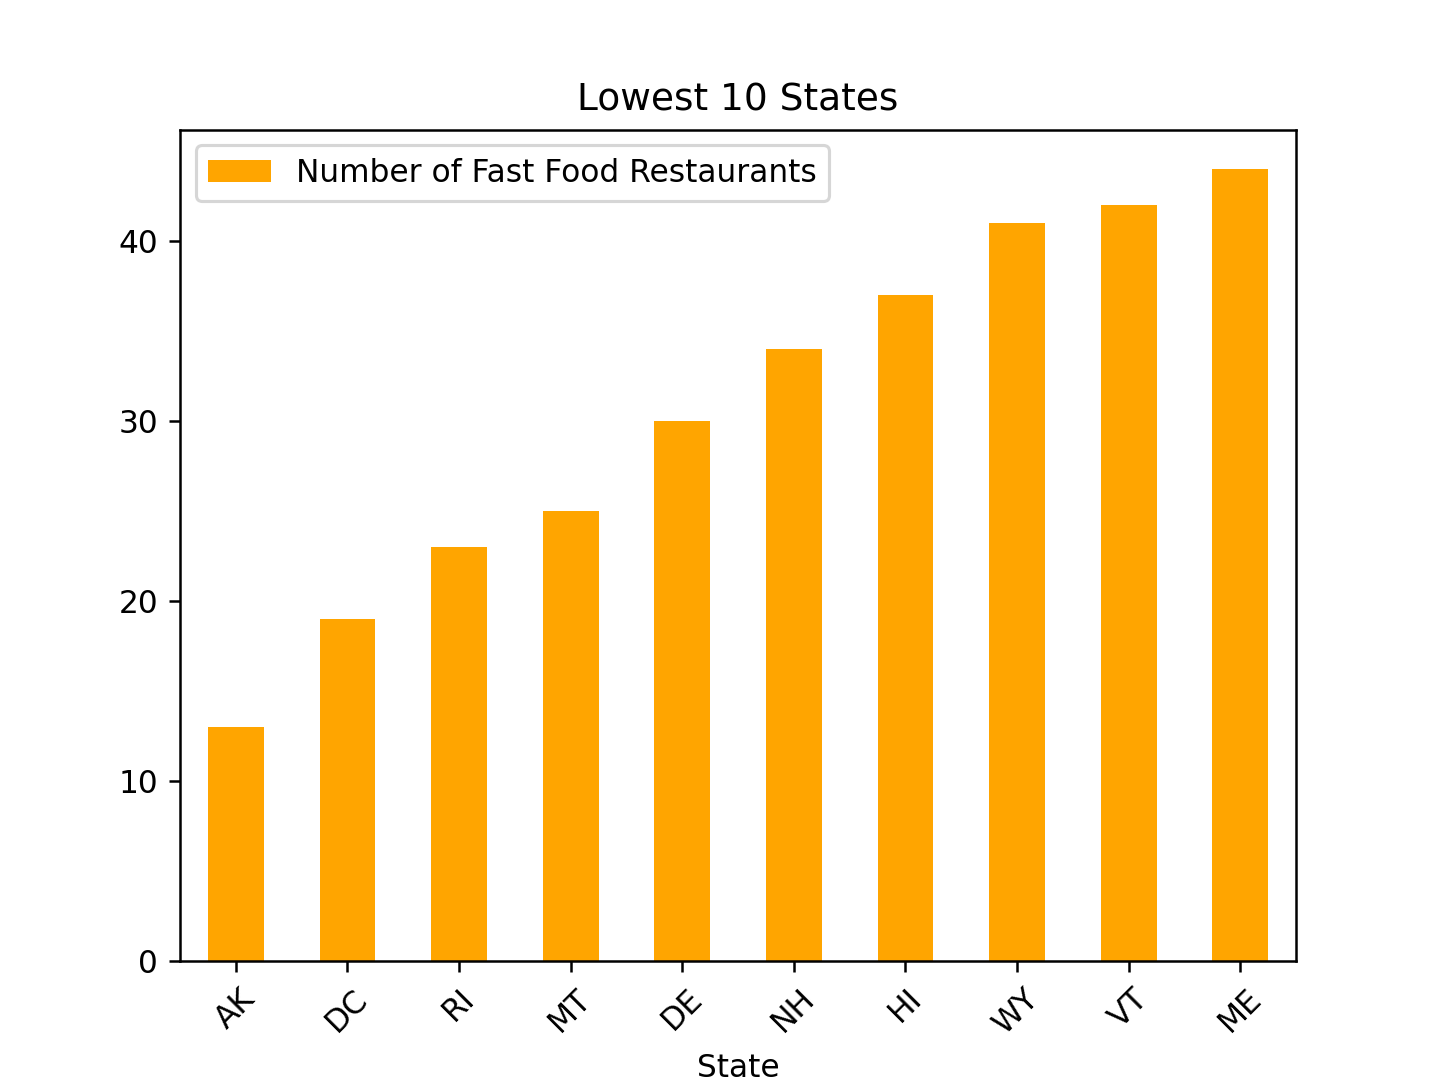

In [24]:
# Bar plot that analyzes the bottom 10 states with the least recorded Fast Food restaurants
# using the summary statistics table: Bottom States

bottom_states.set_index("State").plot(kind="bar", facecolor="orange", rot=45)
plt.title("Lowest 10 States")
plt.xlabel("State")
plt.legend(loc='best')
plt.show()

In [25]:
top_10_cities = pd.DataFrame(fast_food_data['city'].value_counts(ascending=False).head(10).reset_index())
top_10_cities.columns = ['City', 'Total Restaurants']
top_10_cities

,City,Total Restaurants
0,Cincinnati,116
1,Las Vegas,68
2,Houston,60
3,Miami,56
4,Chicago,47
5,Denver,45
6,Phoenix,41
7,Columbus,40
8,Oklahoma City,39
9,Atlanta,38


In [26]:
top_restaurant = pd.DataFrame(fast_food_data['name'].value_counts(ascending=False).head(10).reset_index())
top_restaurant.columns = ['Fast Food Chain', 'Total Number of Locations']
top_restaurant

,Fast Food Chain,Total Number of Locations
0,mcdonalds,2054
1,burger king,1119
2,taco bell,855
3,wendys,721
4,arbys,512
5,kfc,416
6,subway,384
7,dominos pizza,358
8,sonic drive in,246
9,jack in the box,192


<IPython.core.display.Javascript object>


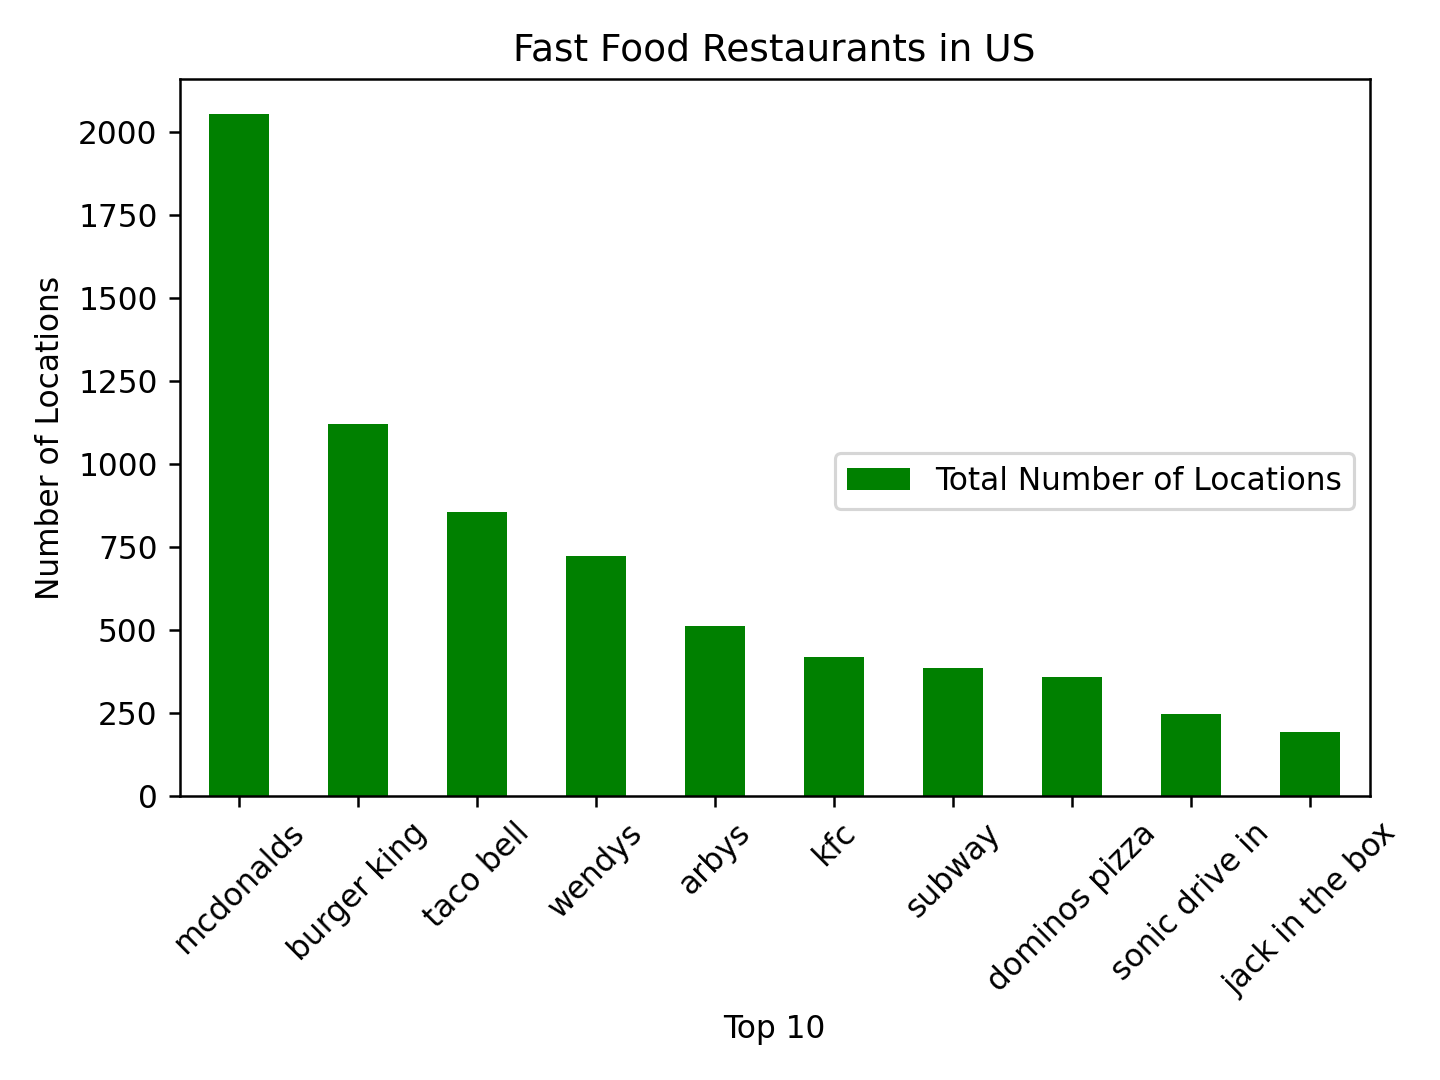

In [27]:
# Create a bar plot analyzing the total number of fast food locations per biggest top 10 chains
# using the summary statistics table: Top Restaurant

top_restaurant.set_index("Fast Food Chain").plot(kind="bar", facecolor="green", rot=45)
plt.title("Fast Food Restaurants in US")
plt.xlabel("Top 10")
plt.ylabel("Number of Locations")
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

In [28]:
# Now to clean up CDC data
trim_data = raw_data[["YearStart", "LocationAbbr", "LocationDesc", "Question", "Data_Value", "Age(years)", "Education",
                     "Race/Ethnicity", "Gender", "Income", "StratificationCategory1"]]
trim_data.head()

,YearStart,LocationAbbr,LocationDesc,Question,Data_Value,Age(years),Education,Race/Ethnicity,Gender,Income,StratificationCategory1
0,2012,WY,Wyoming,Percent of adults aged 18 years and older who ...,48.5,NaN,NaN,American Indian/Alaska Native,NaN,NaN,Race/Ethnicity
1,2012,DC,District of Columbia,Percent of adults aged 18 years and older who ...,31.6,NaN,Less than high school,NaN,NaN,NaN,Education
2,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,35.2,25 - 34,NaN,NaN,NaN,NaN,Age (years)
3,2013,US,National,Percent of adults who engage in no leisure-tim...,27.9,NaN,NaN,NaN,Female,NaN,Gender
4,2011,US,National,Percent of adults who engage in no leisure-tim...,16.9,18 - 24,NaN,NaN,NaN,NaN,Age (years)


In [29]:
trim_data = trim_data.loc[(trim_data["Question"] == "Percent of adults aged 18 years and older who have obesity")]

In [30]:
filter4_data = trim_data.loc[(trim_data["StratificationCategory1"] == "Total")]
filter5_data = filter4_data.loc[(filter4_data["YearStart"] == 2018)]
filter5_data

,YearStart,LocationAbbr,LocationDesc,Question,Data_Value,Age(years),Education,Race/Ethnicity,Gender,Income,StratificationCategory1
8069,2018,AK,Alaska,Percent of adults aged 18 years and older who ...,29.5,NaN,NaN,NaN,NaN,NaN,Total
8240,2018,MD,Maryland,Percent of adults aged 18 years and older who ...,30.9,NaN,NaN,NaN,NaN,NaN,Total
8324,2018,VA,Virginia,Percent of adults aged 18 years and older who ...,30.4,NaN,NaN,NaN,NaN,NaN,Total
8568,2018,GU,Guam,Percent of adults aged 18 years and older who ...,29.8,NaN,NaN,NaN,NaN,NaN,Total
8634,2018,OK,Oklahoma,Percent of adults aged 18 years and older who ...,34.8,NaN,NaN,NaN,NaN,NaN,Total
8821,2018,FL,Florida,Percent of adults aged 18 years and older who ...,30.7,NaN,NaN,NaN,NaN,NaN,Total
8881,2018,OR,Oregon,Percent of adults aged 18 years and older who ...,29.9,NaN,NaN,NaN,NaN,NaN,Total
8928,2018,WA,Washington,Percent of adults aged 18 years and older who ...,28.7,NaN,NaN,NaN,NaN,NaN,Total
9001,2018,NY,New York,Percent of adults aged 18 years and older who ...,27.6,NaN,NaN,NaN,NaN,NaN,Total
9144,2018,MN,Minnesota,Percent of adults aged 18 years and older who ...,30.1,NaN,NaN,NaN,NaN,NaN,Total


In [31]:
obesity_state = filter5_data[["LocationAbbr", "Data_Value"]]
obesity_state

,LocationAbbr,Data_Value
8069,AK,29.5
8240,MD,30.9
8324,VA,30.4
8568,GU,29.8
8634,OK,34.8
8821,FL,30.7
8881,OR,29.9
8928,WA,28.7
9001,NY,27.6
9144,MN,30.1


In [32]:
# rename columns
obesity_state = obesity_state.rename(columns={"LocationAbbr": "State"})
obesity_state.head()

,State,Data_Value
8069,AK,29.5
8240,MD,30.9
8324,VA,30.4
8568,GU,29.8
8634,OK,34.8


In [33]:
top_obesity = obesity_state.sort_values('State',ascending=False)
top_obesity = top_obesity.dropna()
top_obesity

,State,Data_Value
10191,WY,29.0
13400,WV,39.5
11370,WI,32.0
8928,WA,28.7
9485,VT,27.5
8324,VA,30.4
13929,UT,27.8
12661,US,30.9
12521,TX,34.8
10340,TN,34.4


In [34]:
bottom_obesity = obesity_state.sort_values('Data_Value',ascending=True)
bottom_obesity = bottom_obesity.dropna()
bottom_obesity.head(10)

,State,Data_Value
13699,CO,23.0
10251,DC,24.7
12404,HI,24.9
11658,MA,25.7
12258,NJ,25.7
12918,CA,25.8
10221,MT,26.9
12313,CT,27.4
9485,VT,27.5
9001,NY,27.6


In [35]:
# Merging data frames
grouped_data = pd.merge(obesity_state, food_states, on="State", how="inner")
grouped_data


,State,Data_Value,Number of Fast Food Restaurants
0,AK,29.5,13
1,MD,30.9,149
2,VA,30.4,318
3,OK,34.8,201
4,FL,30.7,445
5,OR,29.9,109
6,WA,28.7,198
7,NY,27.6,250
8,MN,30.1,146
9,SD,30.1,103


<IPython.core.display.Javascript object>


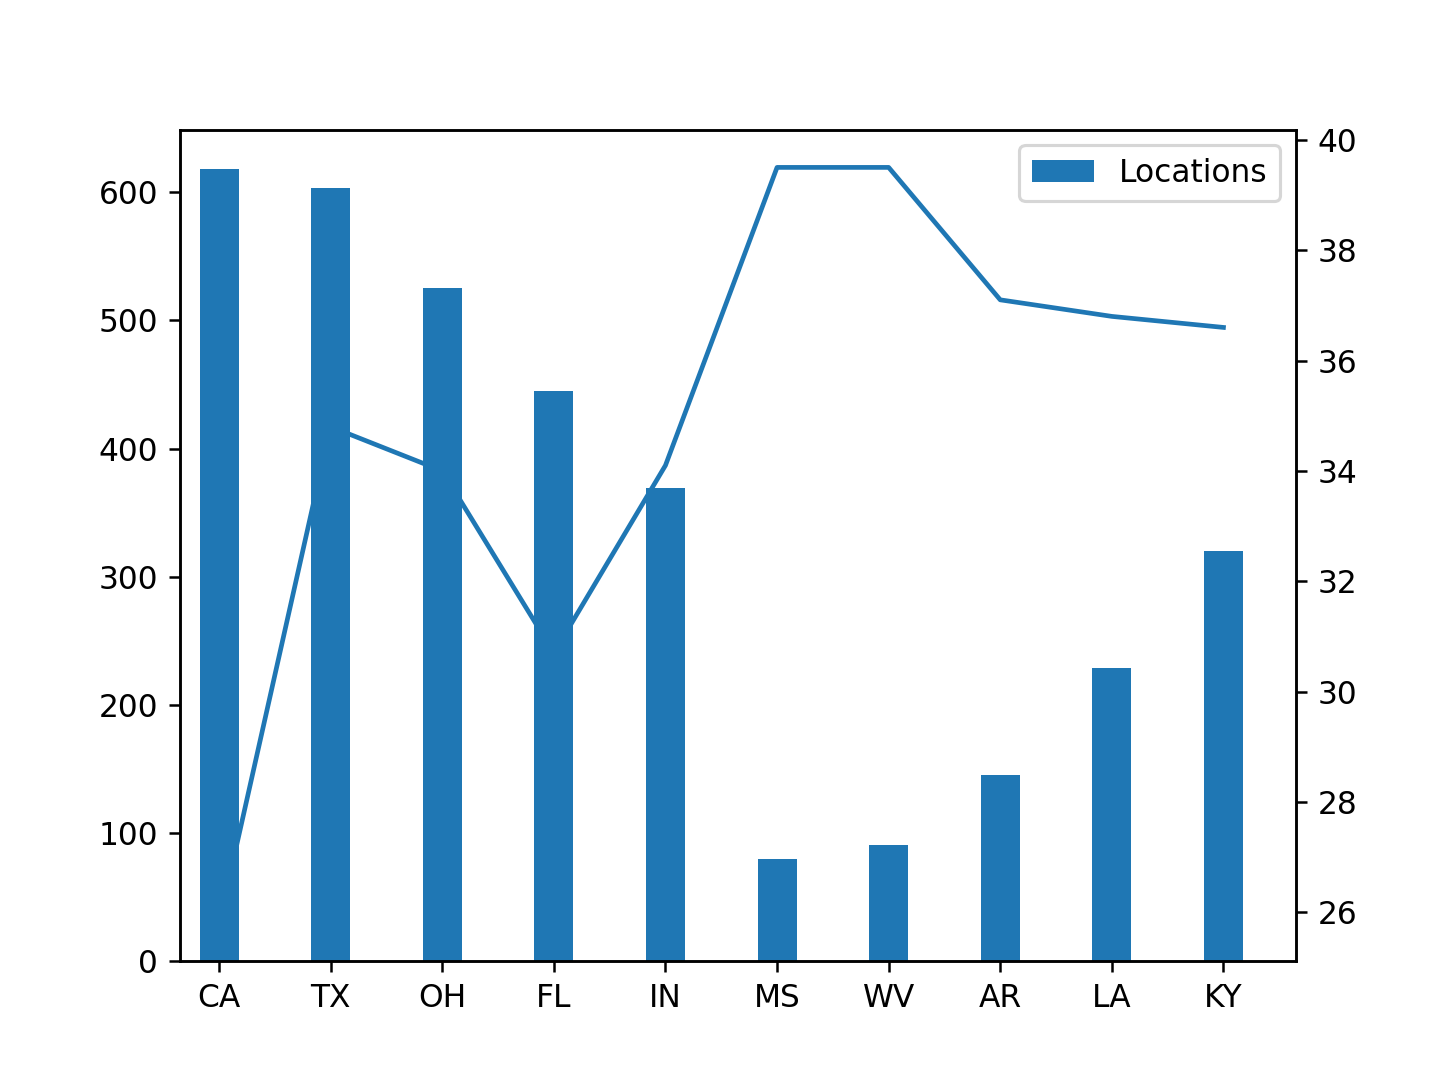

In [36]:
# TOP 5 STATES AND HIGHEST OBESITY RATES
width = .35
top_groups = pd.DataFrame({
    'States': ['CA','TX','OH','FL','IN','MS','WV','AR','LA','KY'],
    'Locations': [618,603,525,445,369,80,91,145,229,320],
    'Obesity_rate': [25.8,34.8,34.0,30.7,34.1,39.5,39.5,37.1,36.8,36.6]})

top_groups[['States', 'Locations']].plot(kind='bar', width = width)
top_groups['Obesity_rate'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(top_groups['Locations'])-width])
ax.set_xticklabels(('CA','TX','OH','FL','IN','MS','WV','AR','LA','KY'))

plt.show()

In [37]:
top_states = pd.DataFrame(fast_food_data['state'].value_counts(ascending=False).head(5).reset_index())
top_states.columns = ['State', 'Number of Fast Food Restaurants']
top_states

,State,Number of Fast Food Restaurants
0,CA,618
1,TX,603
2,OH,525
3,FL,445
4,IN,369


<IPython.core.display.Javascript object>


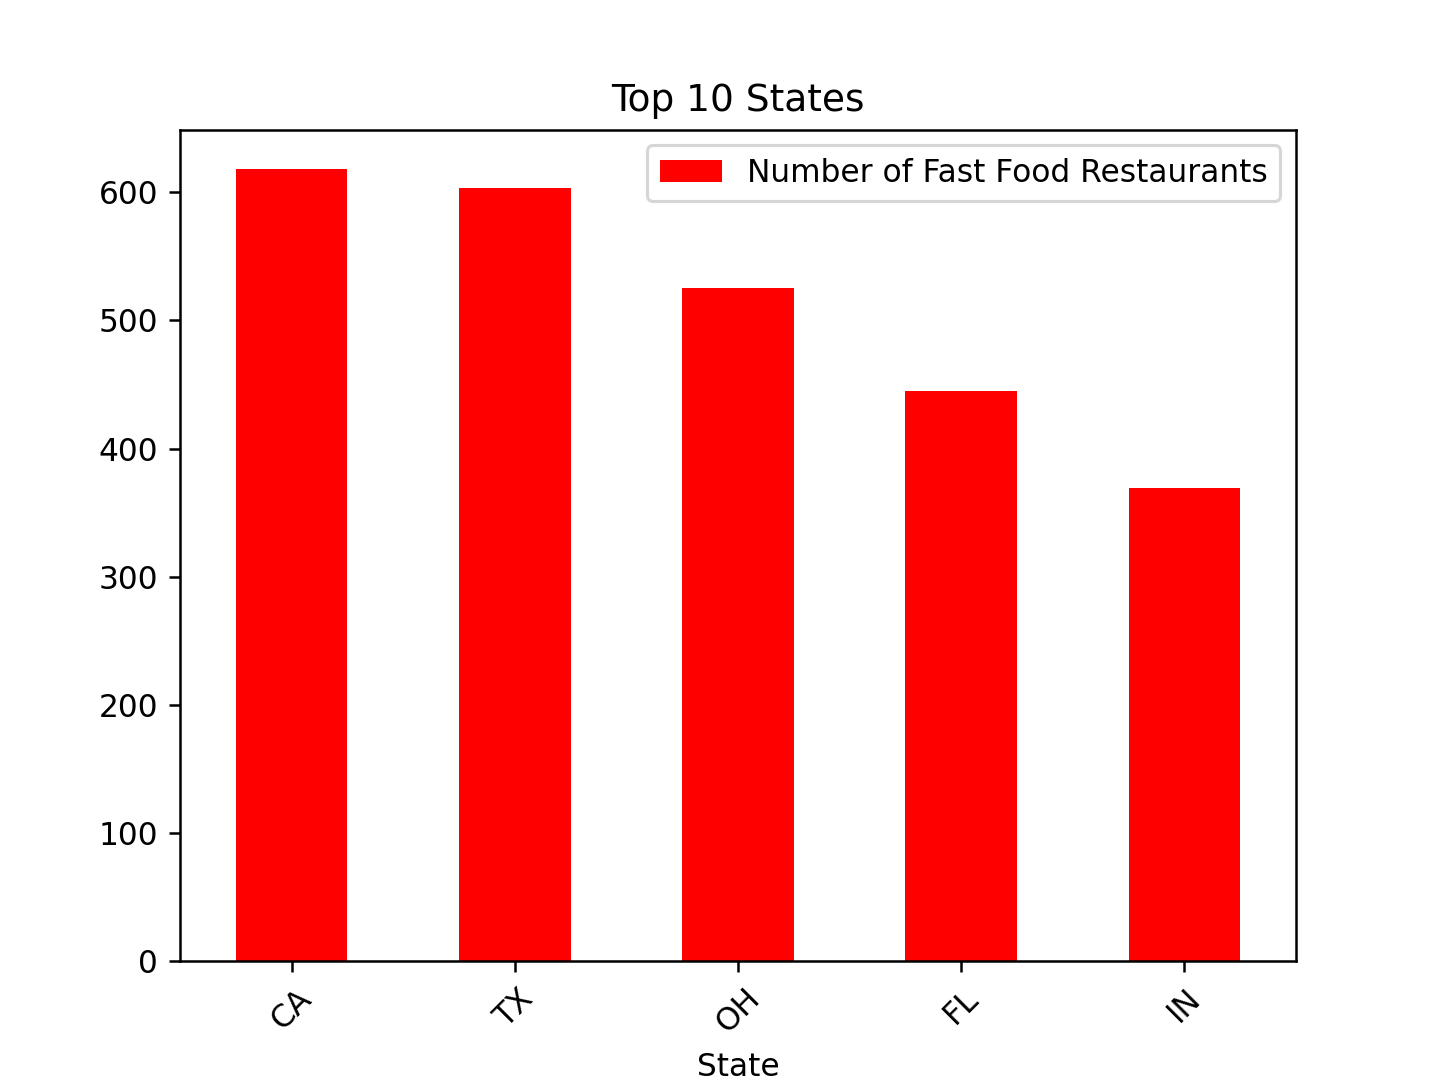

In [38]:
# Bar plot that analyzes the top 10 states with the higest recorded Fast Food restaurants
# using the summary statistics table: Top States

top_states.set_index("State").plot(kind="bar", facecolor="red", rot=45)
plt.title("Top 10 States")
plt.xlabel("State")
plt.legend(loc='best')
plt.show()

In [39]:
# Bar plot that analyzes the bottom 10 states with the least recorded Fast Food restaurants
# using the summary statistics table: Bottom States
bottom_states = pd.DataFrame(fast_food_data['state'].value_counts(ascending=True).head(5).reset_index())
bottom_states.columns = ['State', 'Number of Fast Food Restaurants']
bottom_states

,State,Number of Fast Food Restaurants
0,AK,13
1,DC,19
2,RI,23
3,MT,25
4,DE,30


<IPython.core.display.Javascript object>


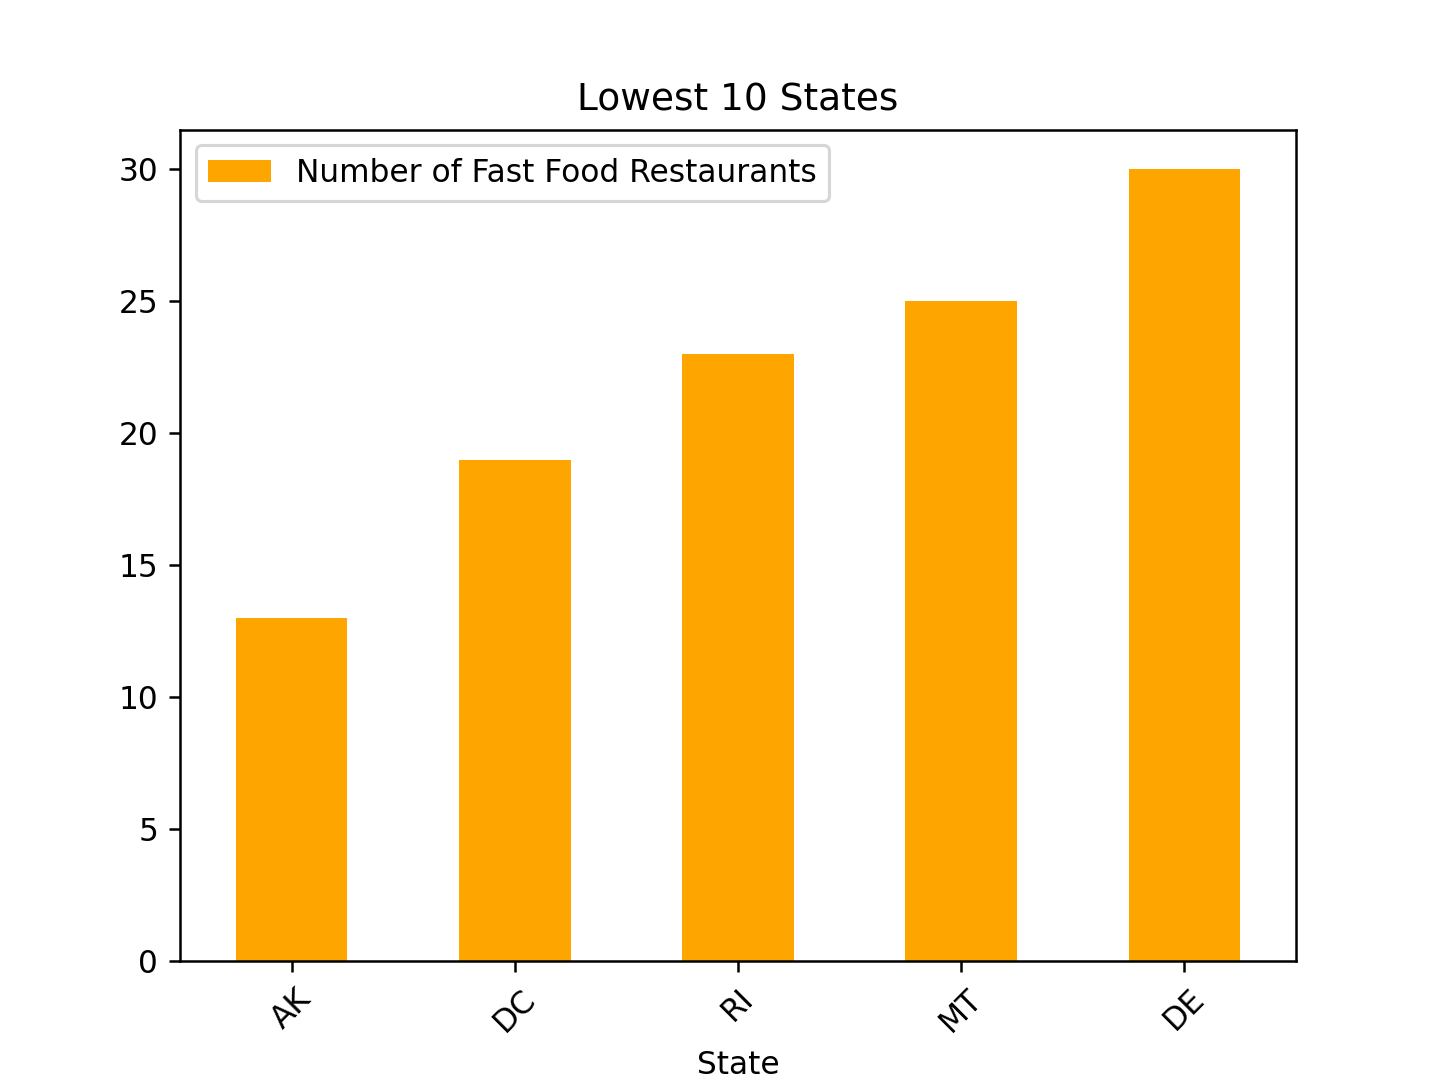

In [40]:
# Bar plot that analyzes the bottom 10 states with the least recorded Fast Food restaurants
# using the summary statistics table: Bottom States

bottom_states.set_index("State").plot(kind="bar", facecolor="orange", rot=45)
plt.title("Lowest 10 States")
plt.xlabel("State")
plt.legend(loc='best')
plt.show()

In [41]:
#top 5 obesity states vs restaurants in that state

In [53]:
sort_by_high = obesity_state.sort_values('Data_Value',ascending=False)
remove_na = sort_by_high.dropna()
top5only = remove_na.head()
top5only

,State,Data_Value
13809,MS,39.5
13400,WV,39.5
11633,AR,37.1
11032,LA,36.8
9764,KY,36.6


In [54]:
bottom5only = remove_na.tail()
bottom5only

,State,Data_Value
11658,MA,25.7
12258,NJ,25.7
12404,HI,24.9
10251,DC,24.7
13699,CO,23.0


In [50]:
food_states = pd.DataFrame(fast_food_data['state'].value_counts(ascending=False).reset_index())
food_states.columns = ['State', 'Number of Fast Food Restaurants']
food_states

,State,Number of Fast Food Restaurants
0,CA,618
1,TX,603
2,OH,525
3,FL,445
4,IN,369
5,NC,344
6,IL,337
7,GA,326
8,MO,321
9,KY,320


In [102]:
grouped2_data = pd.merge(top5only, food_states, on="State", how="inner")
grouped2_data.head()

,State,Data_Value,Number of Fast Food Restaurants
0,MS,39.5,80
1,WV,39.5,91
2,AR,37.1,145
3,LA,36.8,229
4,KY,36.6,320


<IPython.core.display.Javascript object>


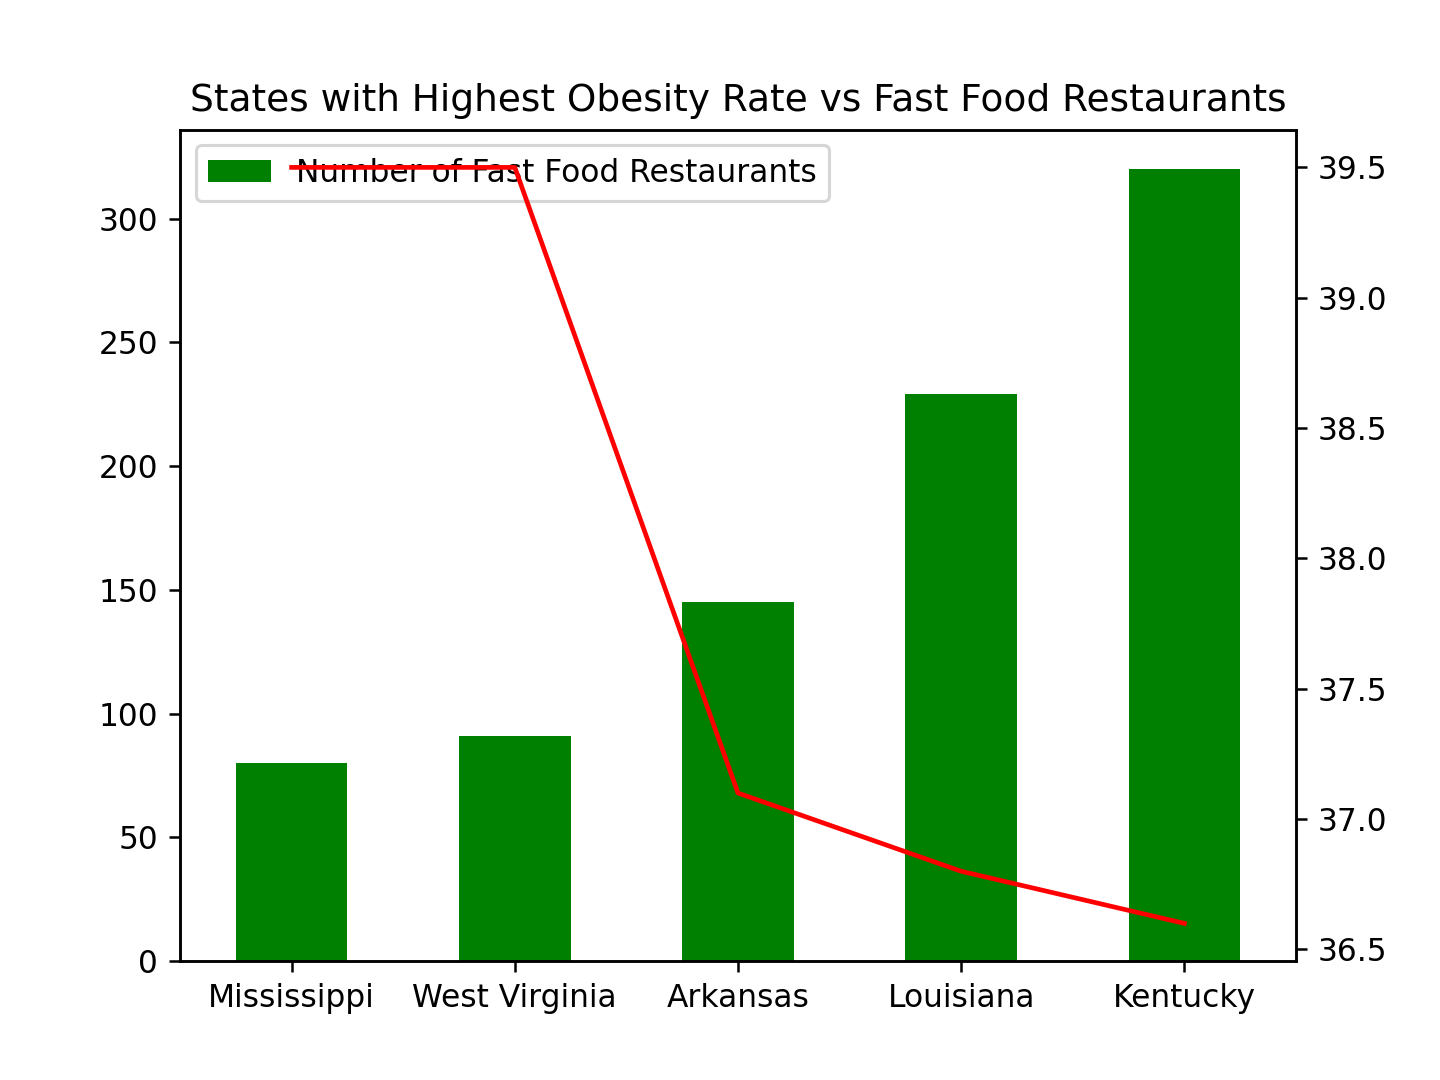

In [94]:
width = .50


grouped2_data[['State','Number of Fast Food Restaurants',]].plot(kind='bar', width = width, color="green")
grouped2_data['Data_Value'].plot(secondary_y=True, color="red")
plt.title("States with Highest Obesity Rate vs Fast Food Restaurants")

ax = plt.gca()
ax.set_xticklabels(("Mississippi", "West Virginia", "Arkansas", "Louisiana", "Kentucky"))
plt.savefig("TopObesity_FastFood.png")



plt.show()


In [60]:
grouped3_data = pd.merge(bottom5only, food_states, on="State", how="inner")
grouped3_data.head()

,State,Data_Value,Number of Fast Food Restaurants
0,MA,25.7,129
1,NJ,25.7,136
2,HI,24.9,37
3,DC,24.7,19
4,CO,23.0,154


<IPython.core.display.Javascript object>


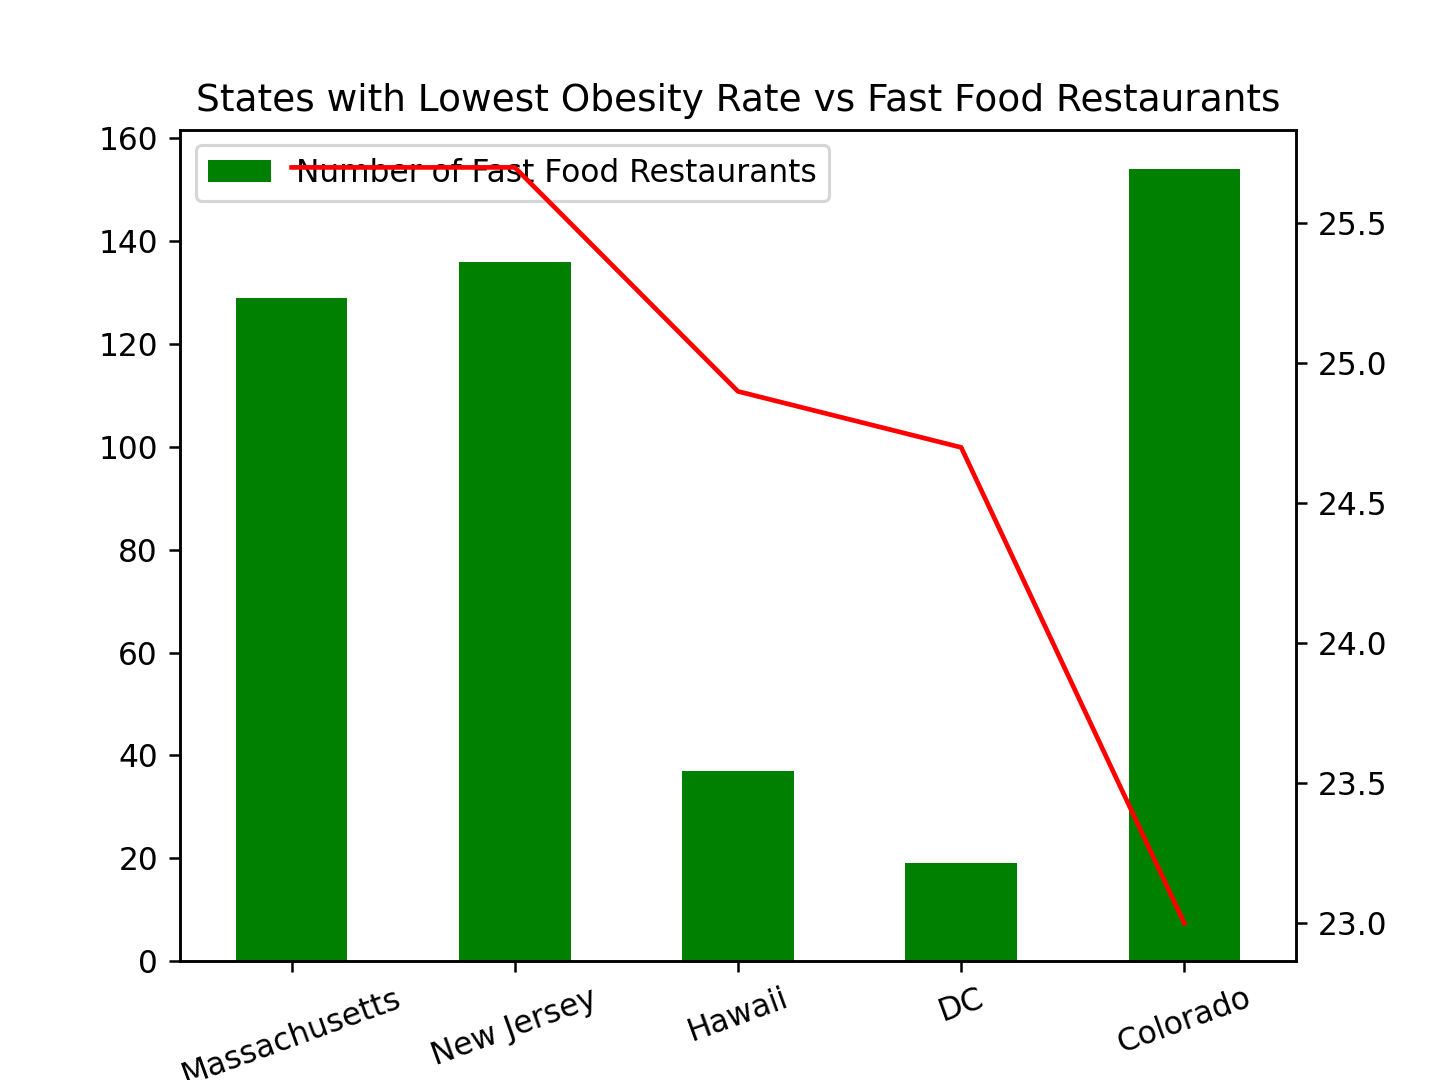

In [101]:
width = .50


grouped3_data[['State','Number of Fast Food Restaurants',]].plot(kind='bar', width = width, color="green")
grouped3_data['Data_Value'].plot(secondary_y=True, color="red", rot=20)
plt.title("States with Lowest Obesity Rate vs Fast Food Restaurants")

ax = plt.gca()
ax.set_xticklabels(("Massachusetts", "New Jersey", "Hawaii", "DC", "Colorado"))
plt.savefig("LowestObesity_FastFood.png")



plt.show()

In [ ]:
#other options - scatter plots

In [119]:
remove_na

,State,Data_Value
13809,MS,39.5
13400,WV,39.5
11633,AR,37.1
11032,LA,36.8
9764,KY,36.6
13982,AL,36.2
12808,IA,35.3
11098,ND,35.1
11235,MO,35.0
8634,OK,34.8


In [121]:
grouped5_data = pd.merge(remove_na, food_states, on="State", how="inner")
grouped5_data

,State,Data_Value,Number of Fast Food Restaurants
0,MS,39.5,80
1,WV,39.5,91
2,AR,37.1,145
3,LA,36.8,229
4,KY,36.6,320
5,AL,36.2,226
6,IA,35.3,162
7,ND,35.1,50
8,MO,35.0,321
9,OK,34.8,201


<IPython.core.display.Javascript object>


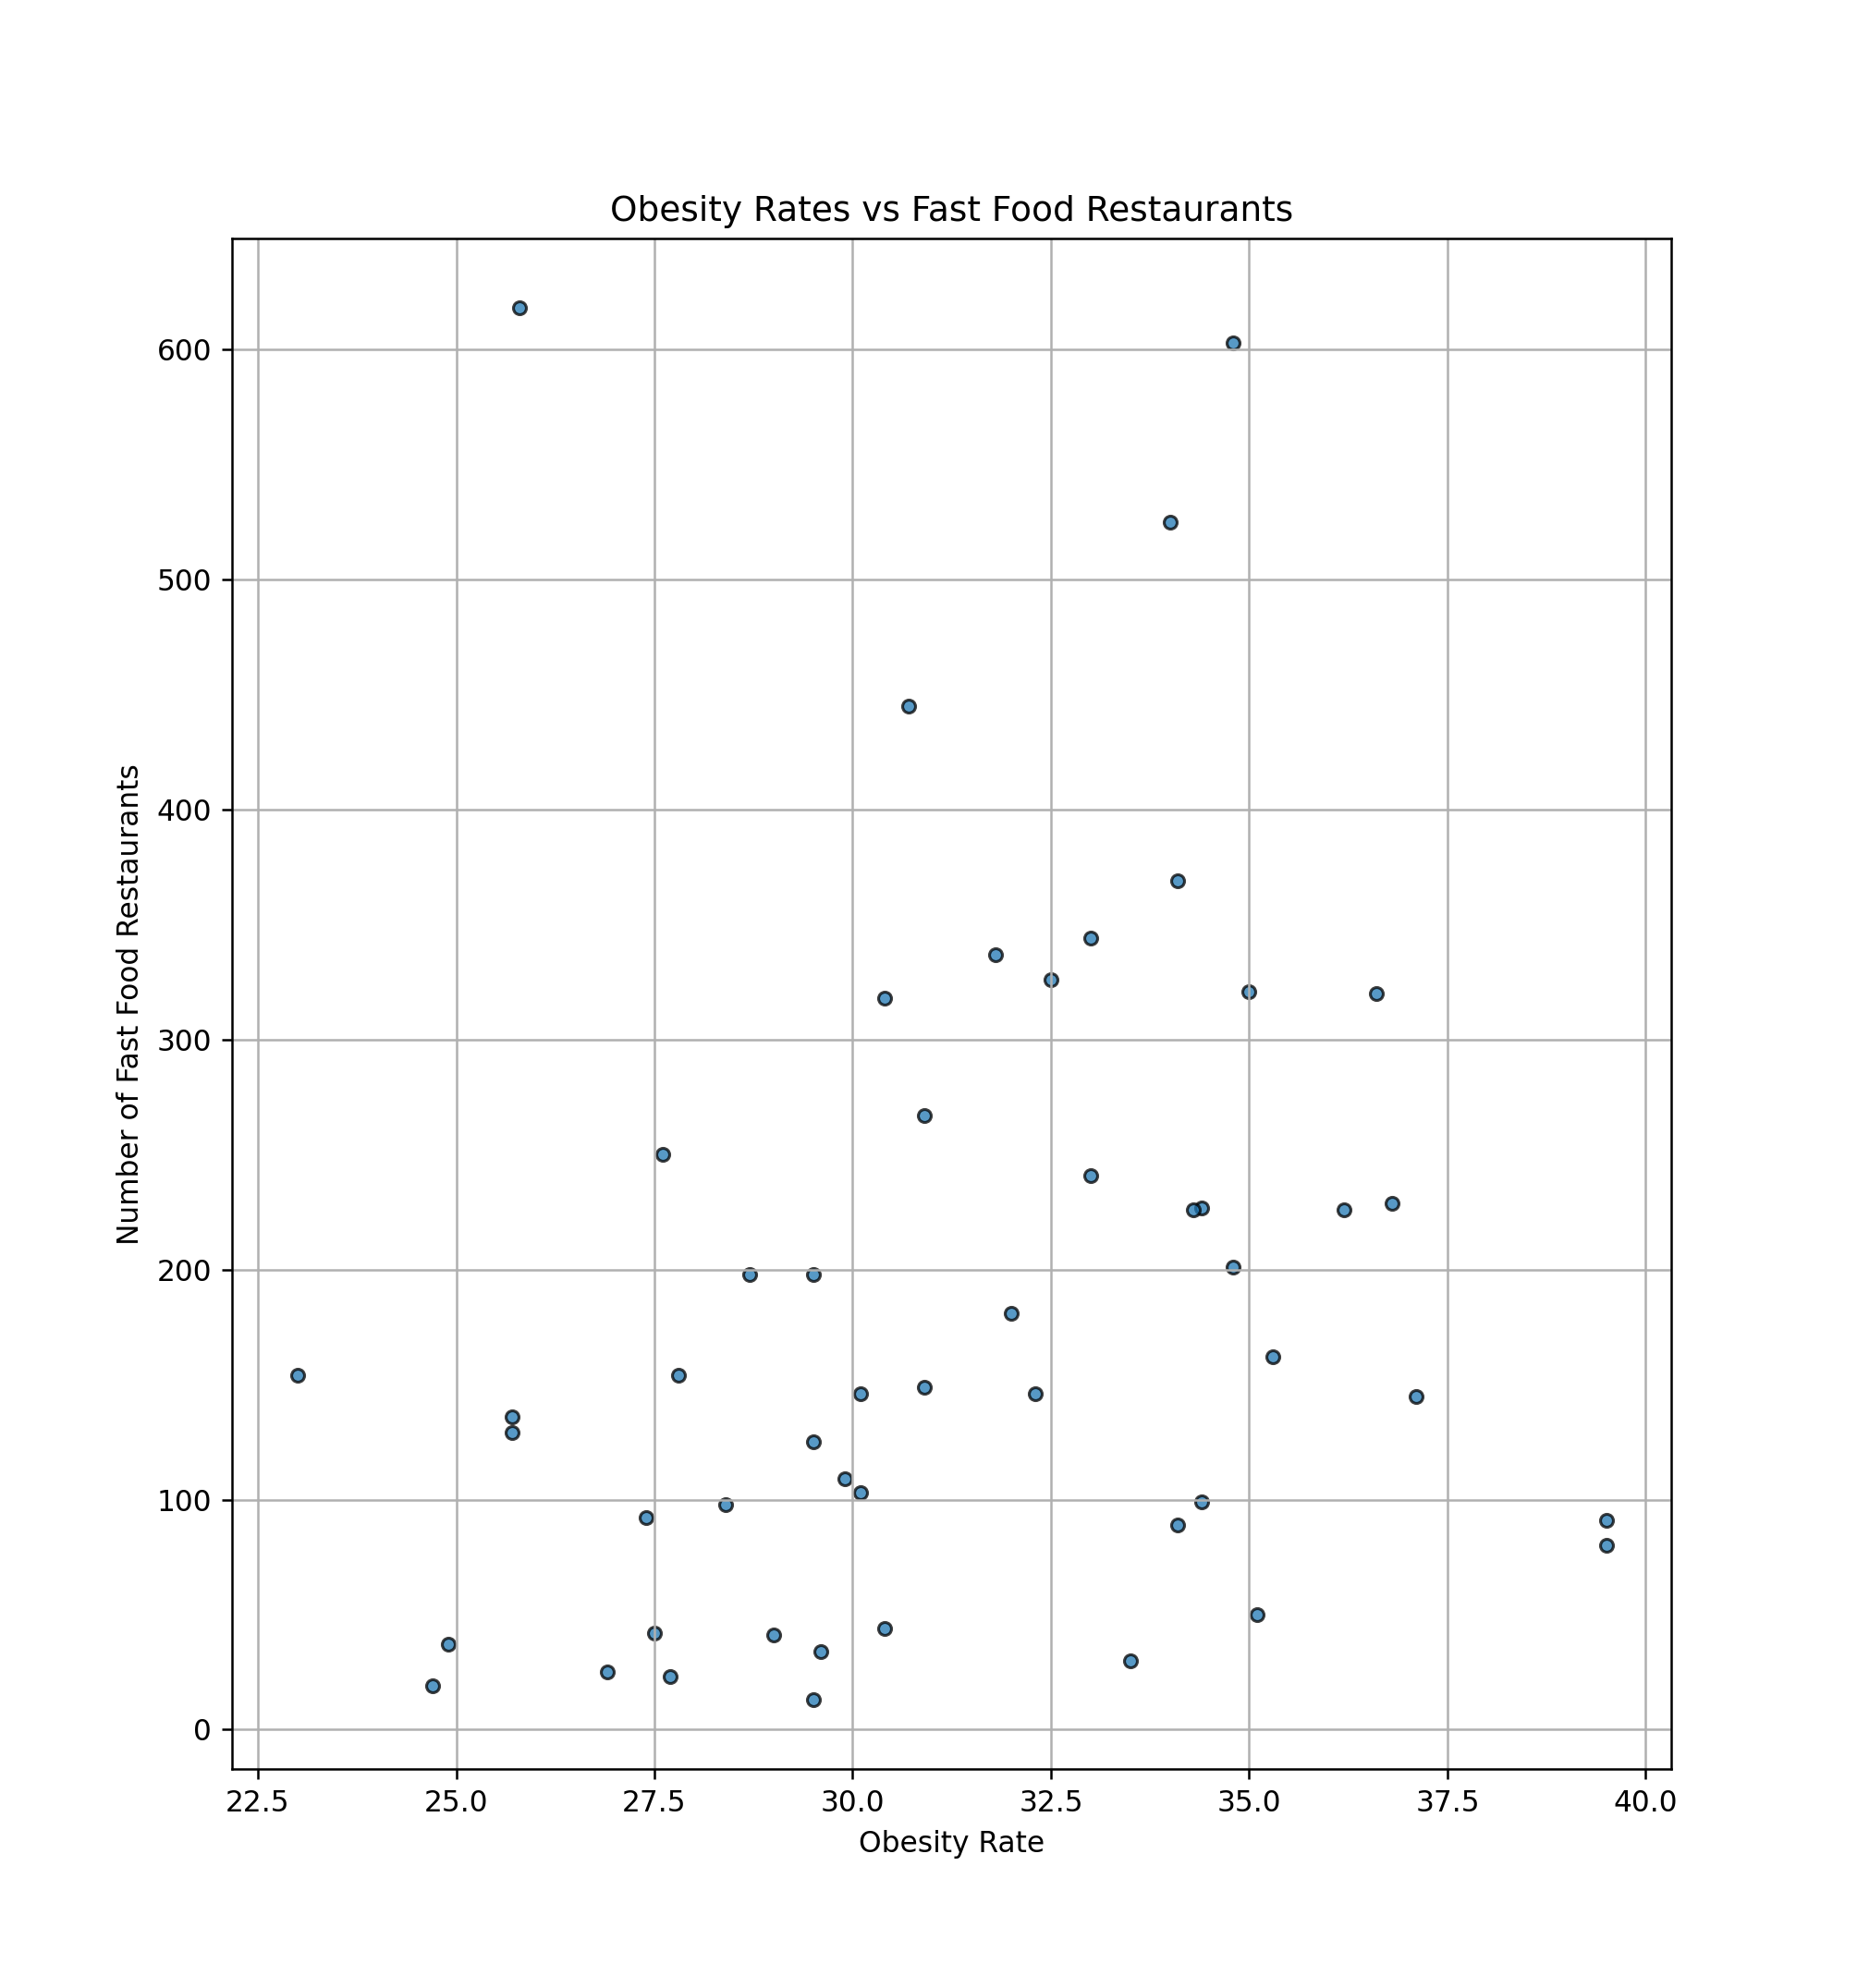

In [122]:
grouped5_data.plot(kind="scatter", x="Data_Value", y="Number of Fast Food Restaurants", grid=True, figsize=(8,8),
              title="Obesity Rates vs Fast Food Restaurants", marker="o", edgecolors="black", alpha=0.75)
    
    
plt.xlabel("Obesity Rate")
plt.savefig("Scatter_ObesityFast.png")

plt.show()
